In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import ensemble
from sklearn import metrics
from sklearn import feature_selection
from sklearn import tree
import seaborn as sns
df=pd.read_csv("c:/Users/visha/Downloads/winequality-red.csv")

In [2]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.isnull().sum()/df.shape[0]

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

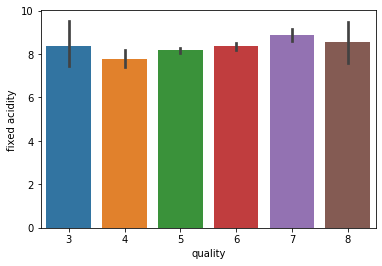

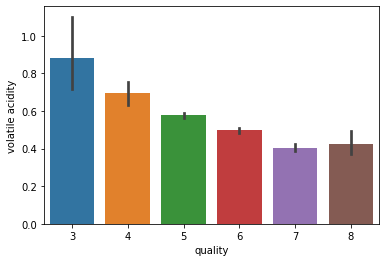

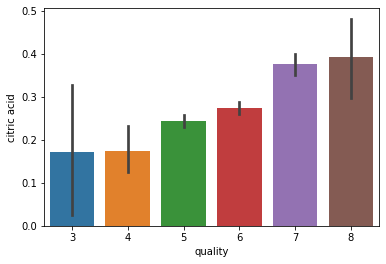

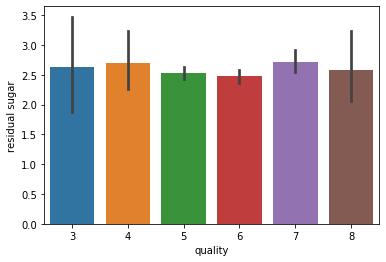

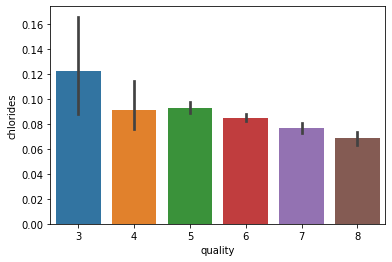

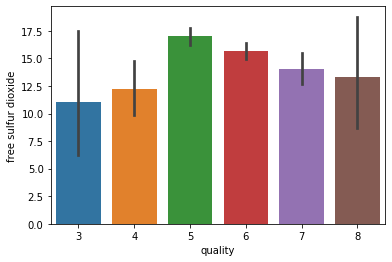

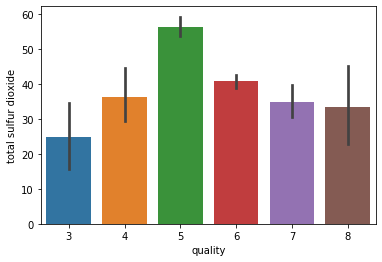

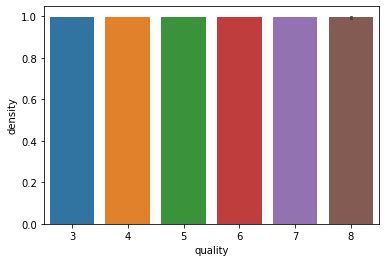

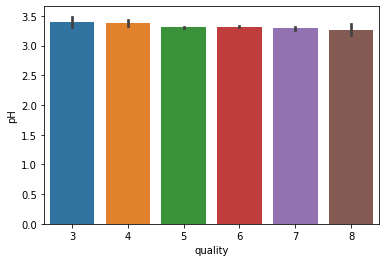

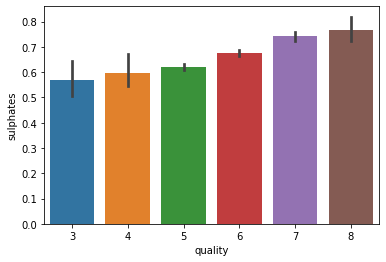

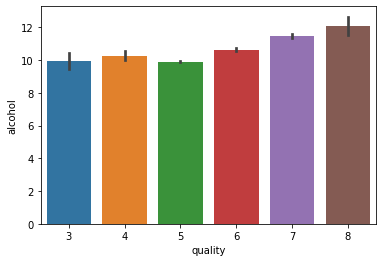

In [7]:
for col in df.columns[:-1]:
    ax=sns.barplot(x="quality",y=col,data=df)
    plt.show()

In [8]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


#fixed acidity, volatile acidity, citric acid and pH are highly co-related also free sulfur dioxide and total sulfur dioxide are
#highly co-related. Also fixed acidity and density are highly co-related.
#We can remove highly co-related features to make our algorithm simpler

In [9]:
# grouping quality into separate labels
# 3-4 is group 0, 5-6 is group 1, 7-8 is group 2
bins = (2.9,4.1,6.1, 8)
group_names = [0,1,2]
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [10]:
df.drop(columns=['fixed acidity','citric acid','free sulfur dioxide','residual sugar','pH'],axis=1,inplace=True)

In [11]:
len(df.columns)

7

In [12]:
df["quality"].value_counts()

1    1319
2     217
0      63
Name: quality, dtype: int64

In [13]:
X=df.drop("quality",axis=1)
Y=df["quality"]
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(X,Y,test_size=0.2,random_state=42)

In [14]:
logm=linear_model.LogisticRegression(multi_class='multinomial',solver='newton-cg')
logm.fit(xtrain,ytrain)
print("logistic regression accuracy(%): ",metrics.accuracy_score(ytest,logm.predict(xtest))*100)

logistic regression accuracy(%):  83.125


In [15]:
dtree=tree.DecisionTreeClassifier()
dtree.fit(xtrain,ytrain)
print("decision tree accuracy(%): ",metrics.accuracy_score(ytest,dtree.predict(xtest))*100)

decision tree accuracy(%):  79.375


In [16]:
randf=ensemble.RandomForestClassifier(n_estimators=50,random_state=41)
randf.fit(xtrain,ytrain)
print("random forest accuracy(%): ",metrics.accuracy_score(ytest,randf.predict(xtest))*100)

random forest accuracy(%):  87.1875


# Tuning decision tree

In [17]:
alldepths=[i for i in range(2,20)]
grid={"max_depth":alldepths}

In [18]:
gridobj=model_selection.GridSearchCV(estimator=dtree,param_grid=grid,scoring='accuracy')
gridobj.fit(xtrain,ytrain)
bestmodel=gridobj.best_estimator_

c:\users\visha\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [19]:
bestmodel.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
metrics.accuracy_score(ytest,bestmodel.predict(xtest))

0.84375

# Checking for different random states

In [23]:
score=0
for i in [10,20,30,40,50]:
    rf=ensemble.RandomForestClassifier(n_estimators=200,random_state=i)
    rf.fit(xtrain,ytrain)
    if(score<metrics.accuracy_score(ytest,rf.predict(xtest))):
        score=metrics.accuracy_score(ytest,rf.predict(xtest))
    print(metrics.accuracy_score(ytest,rf.predict(xtest)))

0.871875
0.865625
0.865625
0.865625
0.86875


In [24]:
score

0.871875

In [ ]:
# Highest score is achieved in random forest classifier 87.2%